In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [2]:
df_incendio = pd.read_csv('Dados_Indendio.csv',encoding='latin-1')

In [3]:
df_incendio

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [4]:
#Nulos 
df_incendio.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

<AxesSubplot: title={'center': 'Analise de campos nulos'}>

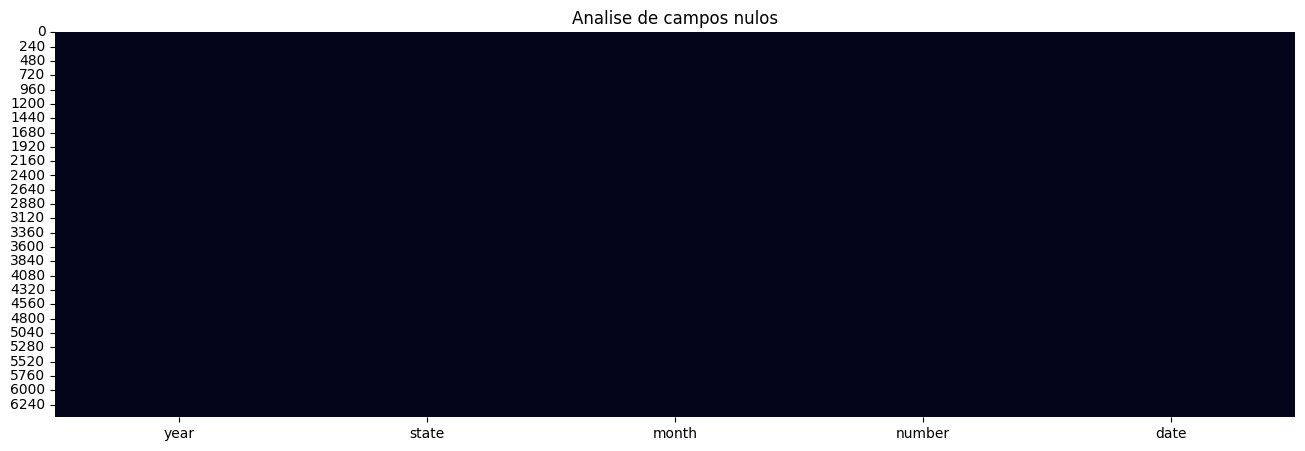

In [5]:
#Nulos Plot 

#Tamanho 
plt.figure(figsize=(16,5))

#Titulo
plt.title('Analise de campos nulos')

sns.heatmap(df_incendio.isnull(),cbar=False)

In [6]:
#Estatistica 
df_incendio.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [7]:
#info 
df_incendio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [8]:
#Campos Unicos 
df_incendio.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

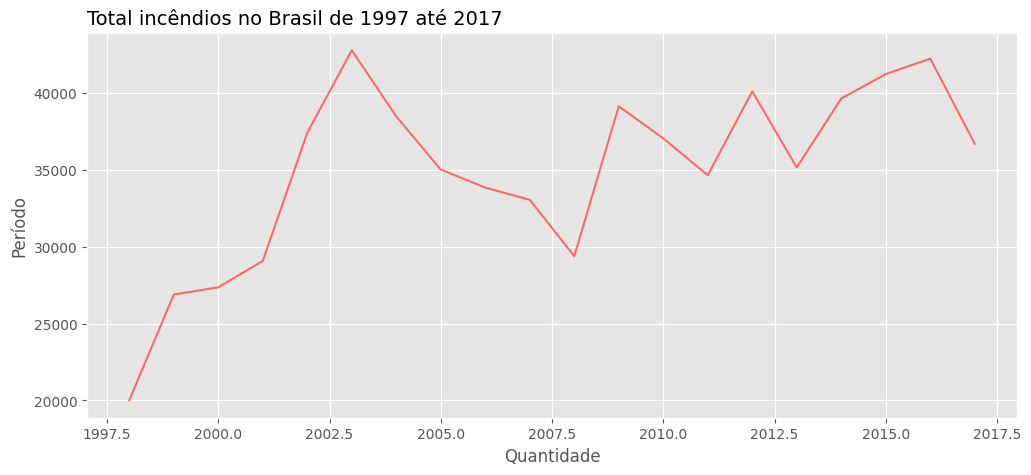

In [19]:
#Analise por ano de incendios
Analise =df_incendio.groupby(by=['year']).sum().reset_index()

Analise.head()

# Tamanho
plt.figure( figsize=(12, 5) )

# Style
plt.style.use('ggplot')

#Titulo 
plt.title('Total incêndios no Brasil de 1997 até 2017', loc='left', fontsize=14)

#Gráfico 
sns.lineplot(data=Analise,x='year',y='number',estimator='sum',color='#ff5555', alpha=0.85 )

# Labels
plt.xlabel('Quantidade')
plt.ylabel('Período');


Text(0, 0.5, 'Número de Incêndios')

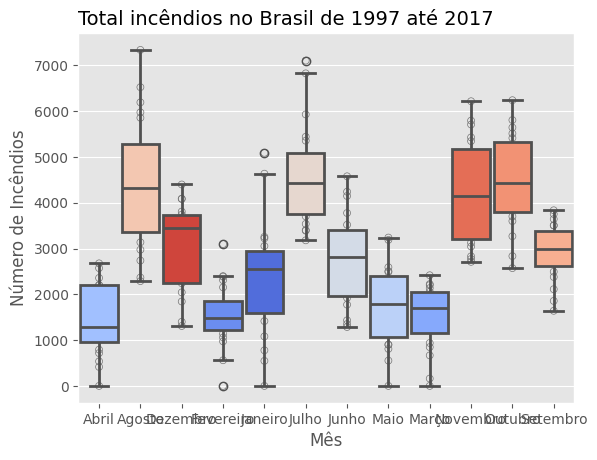

In [31]:
#Analise por ano e mês de incendios
Analise_mes= df_incendio.groupby(by=['year','month']).sum().reset_index()

Analise_mes.head()

#Titulo 
plt.title('Total incêndios no Brasil de 1997 até 2017', loc='left', fontsize=14)

#Gráfico
sns.boxenplot(data=Analise_mes,x='month',y='number')
sns.boxplot( data=Analise_mes, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'] )

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Mato Grosso'),
  Text(1, 0, 'Paraiba'),
  Text(2, 0, 'Sao Paulo'),
  Text(3, 0, 'Rio'),
  Text(4, 0, 'Bahia'),
  Text(5, 0, 'Piau'),
  Text(6, 0, 'Goias'),
  Text(7, 0, 'Minas Gerais'),
  Text(8, 0, 'Tocantins'),
  Text(9, 0, 'Amazonas'),
  Text(10, 0, 'Ceara'),
  Text(11, 0, 'Maranhao'),
  Text(12, 0, 'Pará'),
  Text(13, 0, 'Pernambuco'),
  Text(14, 0, 'Roraima'),
  Text(15, 0, 'Santa Catarina'),
  Text(16, 0, 'Amapa'),
  Text(17, 0, 'Rondonia'),
  Text(18, 0, 'Acre'),
  Text(19, 0, 'Espirito Santo'),
  Text(20, 0, 'Alagoas'),
  Text(21, 0, 'Distrito Federal'),
  Text(22, 0, 'Sergipe')])

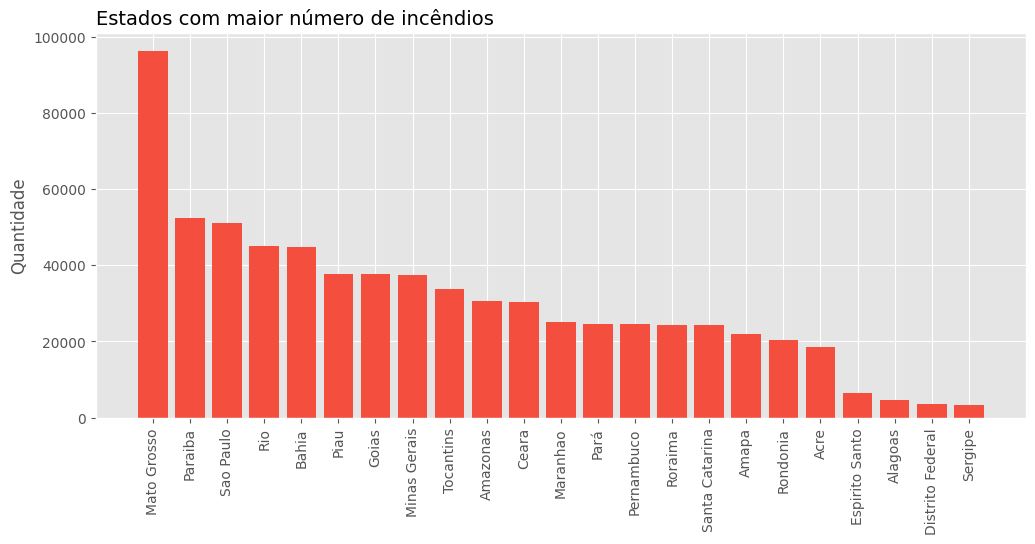

In [41]:
#Analise media pro estado os  incendios
Analise_estado= df_incendio.groupby(by=['state']).sum().reset_index()[['state','number']].sort_values('number',ascending=False)
Analise_estado.head()

#Tamanho 
plt.figure(figsize=(12,5))

#Título 
plt.title('Estados com maior número de incêndios',loc='left', fontsize=14)

#Gráfico 
plt.bar(Analise_estado.state,Analise_estado['number'], color='#f44e3f')

# Labels
plt.ylabel('Quantidade')
plt.xticks( rotation=90 )

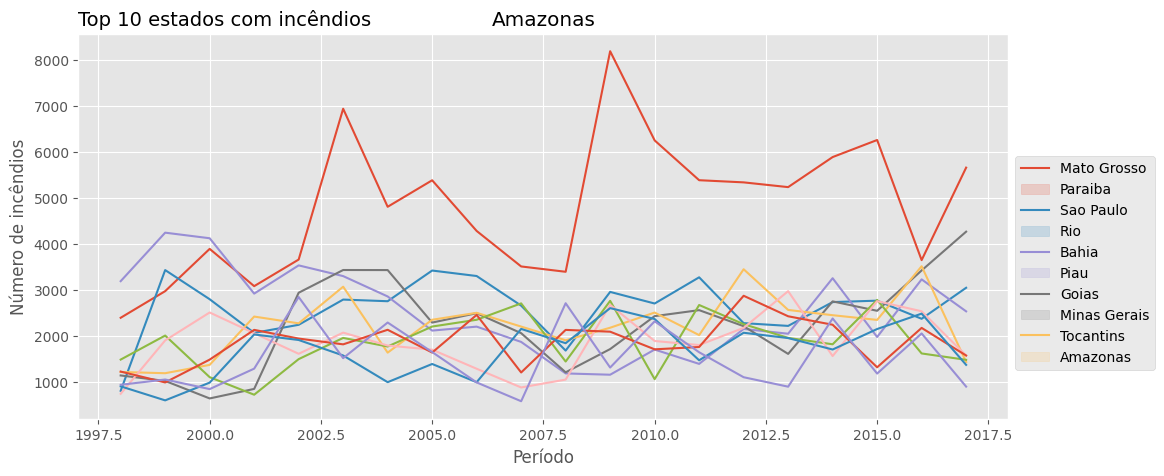

In [53]:
# Estados TOP 10
Lista_TOP10 = Analise_estado['state'][0:10].values

#Tamanho 
plt.figure(figsize=(12,5))

#Título 
plt.title('Top 10 estados com incêndios',loc='left', fontsize=14)

#Loop
for Coluna in Lista_TOP10:
    #Analise por ano de incendios
    Filtro = df_incendio.loc[df_incendio['state']==Coluna]

    #Agrupar os valores e sumarizar
    Analise_Local =Filtro.groupby(by=['year']).sum().reset_index()
    
    #Plot 
    plt.title(Coluna)
    sns.lineplot(data=Analise_Local,x='year',y='number')

# Labels
plt.xlabel('Período')
plt.ylabel('Número de incêndios')

#Legenda 
plt.legend( Lista_TOP10, bbox_to_anchor=(1, 0.7) )